In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699942 entries, 0 to 699941
Columns: 198 entries, Quantity Sold (kilo) to Sale or Return_sale
dtypes: bool(196), float64(2)
memory usage: 141.5 MB


In [3]:
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2023-12-04 12:29:09.508274: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-04 12:29:09.508328: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-04 12:29:09.508341: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-04 12:29:09.508390: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-04 12:29:09.508415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([559953, 197]), TensorShape([69994, 197]), (69995, 197))

In [4]:
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/testing_dataset.csv')
df_test.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper,Item Name_Agaricus Bisporus,Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth,Item Name_Apricot Bao Mushroom,Item Name_Artemisia Stelleriana,Item Name_Basil,...,Item Name_Zhimaxiancai,Item Name_Zhuyecai,Item Name_Zhuyecai,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum,Sale or Return_sale
29389,0.603,4.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
50935,0.569,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
53546,1.000,3.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
22143,0.100,10.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
39030,0.503,6.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [5]:
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(197, activation='relu', input_shape=(x_train_tensor.shape[1],)))

model.add(tf.keras.layers.Reshape((1, 197))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(32))

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 20

history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/20


2023-12-04 12:29:18.109016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-12-04 12:29:18.182852: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


17499/17499 [==============================] - 256s 15ms/step - loss: 0.1320 - mae: 0.1320 - val_loss: 0.1262 - val_mae: 0.1262
Epoch 2/20
17499/17499 [==============================] - 255s 15ms/step - loss: 0.1253 - mae: 0.1253 - val_loss: 0.1240 - val_mae: 0.1240
Epoch 3/20
17499/17499 [==============================] - 255s 15ms/step - loss: 0.1239 - mae: 0.1239 - val_loss: 0.1230 - val_mae: 0.1230
Epoch 4/20
17499/17499 [==============================] - 255s 15ms/step - loss: 0.1234 - mae: 0.1234 - val_loss: 0.1222 - val_mae: 0.1222
Epoch 5/20
17499/17499 [==============================] - 258s 15ms/step - loss: 0.1232 - mae: 0.1232 - val_loss: 0.1219 - val_mae: 0.1219
Epoch 6/20
17499/17499 [==============================] - 257s 15ms/step - loss: 0.1230 - mae: 0.1230 - val_loss: 0.1217 - val_mae: 0.1217
Epoch 7/20
17499/17499 [==============================] - 257s 15ms/step - loss: 0.1229 - mae: 0.1229 - val_loss: 0.1218 - val_mae: 0.1218
Epoch 8/20
17499/17499 [==============

In [7]:
y_predictions = model.predict(x_test_tensor)
y_predictions[:5]

2188/2188 [==============================] - 16s 7ms/step


array([[0.443424  ],
       [0.2242806 ],
       [0.40660104],
       [0.3679442 ],
       [0.25421163]], dtype=float32)

In [8]:
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.452, 0.22 , 0.973, 0.251, 0.222], dtype=float32)>

Text(0, 0.5, 'loss')

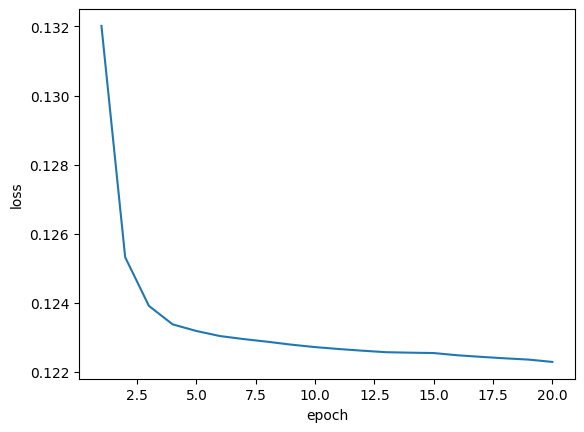

In [9]:
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')

In [11]:
final_model = tf.keras.Sequential()

final_model.add(tf.keras.layers.Dense(197, activation='relu', input_shape=(x_train_tensor.shape[1],)))

final_model.add(tf.keras.layers.Reshape((1, 197))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(128, activation='relu'))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.LSTM(32))

final_model.add(tf.keras.layers.Dense(1, activation='linear'))

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 10

history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/10


2023-12-04 14:04:40.287476: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


17499/17499 [==============================] - 270s 15ms/step - loss: 0.1312 - mae: 0.1312 - val_loss: 0.1271 - val_mae: 0.1271
Epoch 2/10
17499/17499 [==============================] - 256s 15ms/step - loss: 0.1252 - mae: 0.1252 - val_loss: 0.1235 - val_mae: 0.1235
Epoch 3/10
17499/17499 [==============================] - 258s 15ms/step - loss: 0.1238 - mae: 0.1238 - val_loss: 0.1219 - val_mae: 0.1219
Epoch 4/10
17499/17499 [==============================] - 252s 14ms/step - loss: 0.1233 - mae: 0.1233 - val_loss: 0.1218 - val_mae: 0.1218
Epoch 5/10
17499/17499 [==============================] - 249s 14ms/step - loss: 0.1231 - mae: 0.1231 - val_loss: 0.1218 - val_mae: 0.1218
Epoch 6/10
17499/17499 [==============================] - 250s 14ms/step - loss: 0.1230 - mae: 0.1230 - val_loss: 0.1220 - val_mae: 0.1220
Epoch 7/10
17499/17499 [==============================] - 247s 14ms/step - loss: 0.1229 - mae: 0.1229 - val_loss: 0.1218 - val_mae: 0.1218
Epoch 8/10
17499/17499 [==============

In [12]:
final_model.evaluate(x_test_tensor, y_test_tensor)

2188/2188 [==============================] - 15s 7ms/step - loss: 0.1218 - mae: 0.1218


[0.12177867442369461, 0.12177867442369461]

In [13]:
final_model.save('final_sold_amount_model')

INFO:tensorflow:Assets written to: final_sold_amount_model/assets


INFO:tensorflow:Assets written to: final_sold_amount_model/assets
